<a href="https://colab.research.google.com/github/blackhat-bit/hw7_generative_modles/blob/main/Another_copy_of_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7: Denoising Diffusion Probabilistic Models
## Submission date: 31\07\2025, 23:59.

Submitted by:

 **Student 1 Name+ID

 **Student 2 Name+ID


<font color='red'>Before submission, please make sure that all the plots and results are present as a colab notebook file</font>

# Assignment 1: Proof of Posterior Distribution in DDPM

### Problem Statement

We need to prove that $q(x_{t-1}|x_t, x_0) = \mathcal{N}(x_{t-1}; \tilde{\mu}_t(x_t, x_0), \tilde{\beta}_t\mathbf)$ using Bayes' theorem and find $\tilde{\mu}_t$ and $\tilde{\beta}_t$.

### Solution
We start by applying Bayes' theorem:
$$
q(x_{t-1}|x_t, x_0) = \frac{q(x_t | x_{t-1}, x_0) \cdot q(x_{t-1} | x_0)}{q(x_t | x_0)} \tag{1}
$$

Since the forward process is Markovian, $x_t$ only depends on $x_{t-1}$ and not on $x_0$ given $x_{t-1}$:
$$
q(x_t | x_{t-1}, x_0) = q(x_t | x_{t-1}) \tag{2}
$$

From the DDPM forward process definitions, we know:
$$
q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t}x_{t-1}, \beta_t\mathbf{I}) \tag{3}
$$
$$
q(x_{t-1} | x_0) = \mathcal{N}(x_{t-1}; \sqrt{\bar{\alpha}_{t-1}}x_0, (1 - \bar{\alpha}_{t-1})\mathbf{I}) \tag{4}
$$
$$
q(x_t | x_0) = \mathcal{N}(x_t; \sqrt{\bar{\alpha}_t}x_0, (1 - \bar{\alpha}_t)\mathbf{I}) \tag{5}
$$
where $\bar{\alpha}_t = \prod_{i=1}^{t} \alpha_i$ and $\alpha_t = 1 - \beta_t$.

Now we'll use the result from HW1 Question 11, which showed that the product of Gaussians results in a Gaussian distribution. Specifically, we work with the log-probabilities:
$$
\log q(x_{t-1}|x_t, x_0) = \log q(x_t|x_{t-1}) + \log q(x_{t-1}|x_0) - \log q(x_t|x_0) + \text{const} \tag{6}
$$

Expanding each term:
$$
\log q(x_t|x_{t-1}) = -\frac{1}{2\beta_t}\|x_t - \sqrt{\alpha_t}x_{t-1}\|^2 + \text{const} \tag{7}
$$
$$
\log q(x_{t-1}|x_0) = -\frac{1}{2(1-\bar{\alpha}_{t-1})}\|x_{t-1} - \sqrt{\bar{\alpha}_{t-1}}x_0\|^2 + \text{const} \tag{8}
$$
$$
\log q(x_t|x_0) = -\frac{1}{2(1-\bar{\alpha}_t)}\|x_t - \sqrt{\bar{\alpha}_t}x_0\|^2 + \text{const} \tag{9}
$$

Following the technique from HW1 Question 12 (completing the square), we'll collect all terms involving $x_{t-1}$ from the log-probabilities. Note that the term $-\log q(x_t|x_0)$ from Equation (6) can be dropped, as it does not depend on $x_{t-1}$ and will be absorbed by the normalization constant of the resulting posterior distribution. We are therefore interested in the expression:
$$
-\frac{1}{2\beta_t}\|x_t - \sqrt{\alpha_t}x_{t-1}\|^2 - \frac{1}{2(1-\bar{\alpha}_{t-1})}\|x_{t-1} - \sqrt{\bar{\alpha}_{t-1}}x_0\|^2 \tag{10}
$$
$$
= -\frac{1}{2\beta_t}(x_t^T x_t - 2\sqrt{\alpha_t}x_t^T x_{t-1} + \alpha_t x_{t-1}^T x_{t-1}) - \frac{1}{2(1-\bar{\alpha}_{t-1})}(x_{t-1}^T x_{t-1} - 2\sqrt{\bar{\alpha}_{t-1}}x_0^T x_{t-1} + \bar{\alpha}_{t-1}x_0^T x_0) \tag{11/12}
$$

Collecting coefficients of $x_{t-1}^T x_{t-1}$ and $x_{t-1}$:
$$
\text{Coefficient of } x_{t-1}^T x_{t-1}: -\frac{1}{2}\left(\frac{\alpha_t}{\beta_t} + \frac{1}{1-\bar{\alpha}_{t-1}}\right) \tag{13}
$$
$$
\text{Linear term in } x_{t-1}: \left(\frac{\sqrt{\alpha_t}}{\beta_t}x_t^T + \frac{\sqrt{\bar{\alpha}_{t-1}}}{1-\bar{\alpha}_{t-1}}x_0^T\right) \tag{14}
$$

Using the fact that $\bar{\alpha}_t = \alpha_t \bar{\alpha}_{t-1}$ and $1 - \bar{\alpha}_t = \beta_t + \alpha_t(1-\bar{\alpha}_{t-1})$:
$$
\frac{\alpha_t}{\beta_t} + \frac{1}{1-\bar{\alpha}_{t-1}} = \frac{\alpha_t(1-\bar{\alpha}_{t-1}) + \beta_t}{\beta_t(1-\bar{\alpha}_{t-1})} = \frac{1-\bar{\alpha}_t}{\beta_t(1-\bar{\alpha}_{t-1})} \tag{15}
$$

Therefore, the precision (inverse variance) is:
$$
\tilde{\beta}_t^{-1} = \frac{1-\bar{\alpha}_t}{\beta_t(1-\bar{\alpha}_{t-1})} \tag{16}
$$
Which gives us the variance:
$$
\boxed{\tilde{\beta}_t = \frac{\beta_t(1-\bar{\alpha}_{t-1})}{1-\bar{\alpha}_t}} \tag{17}
$$

For the mean, we explicitly derive it from the coefficients of the linear terms in $x_{t-1}$ found in the exponent. The coefficient corresponds to $\tilde{\mu}_t/\tilde{\beta}_t$. Therefore, we have:
$$
\tilde{\mu}_t = \tilde{\beta}_t \cdot (\text{coefficient of } x_{t-1}) = \tilde{\beta}_t \left( \frac{\sqrt{\alpha_t}}{\beta_t}x_t + \frac{\sqrt{\bar{\alpha}_{t-1}}}{1-\bar{\alpha}_{t-1}}x_0 \right) \tag{18}
$$

Substituting our derived expression for $\tilde{\beta}_t$ from Equation (17):
$$
\tilde{\mu}_t = \left( \frac{\beta_t(1-\bar{\alpha}_{t-1})}{1-\bar{\alpha}_t} \right) \left( \frac{\sqrt{\alpha_t}}{\beta_t}x_t + \frac{\sqrt{\bar{\alpha}_{t-1}}}{1-\bar{\alpha}_{t-1}}x_0 \right) \tag{19}
$$

Distributing the terms cancels out the denominators and yields the final expression for the mean:

$$
\boxed{\tilde{\mu}_t = \frac{\sqrt{\alpha_t}(1-\bar{\alpha}_{t-1})x_t + \sqrt{\bar{\alpha}_{t-1}}\beta_t x_0}{1-\bar{\alpha}_t}} \tag{20}
$$

This completes the proof that $q(x_{t-1}|x_t, x_0) = \mathcal{N}(x_{t-1}; \tilde{\mu}_t(x_t, x_0), \tilde{\beta}_t\mathbf)$ with the derived expressions for $\tilde{\mu}_t$ and $\tilde{\beta}_t$.

## Configurations and initializations

This section loads libraries and configurations for various tasks for this course

In [ ]:
## Standard libraries
import os
import math
import numpy as np
import pandas as pd
from collections import defaultdict

## Imports for plotting
import matplotlib.pyplot as plt
plt.set_cmap('cividis')
import seaborn as sns

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

# Path to the folder where the datasets are/should be downloaded (e.g. MNIST)
DATASET_PATH = "../data"

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Fetching the device that will be used throughout this notebook
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda")
print("Using device", device)

In [ ]:
def scale(sample):
    return 2 * sample - 1

# Transformations applied on each image => only make them a tensor
transform = transforms.Compose([transforms.ToTensor(), scale])

# Loading the training dataset. We need to split it into a training and validation part
train_dataset = MNIST(root=DATASET_PATH, train=True, transform=transform, download=True)

train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Loading the test set
test_set = MNIST(root=DATASET_PATH, train=False, transform=transform, download=True)

# We define a set of data loaders that we can use for various purposes later.
train_loader = data.DataLoader(train_set, batch_size=128, shuffle=True,  drop_last=True)
val_loader   = data.DataLoader(val_set,   batch_size=128, shuffle=False, drop_last=True)
test_loader  = data.DataLoader(test_set,  batch_size=128, shuffle=False, drop_last=True)

print('Train size:', len(train_loader.dataset))
print('Validation size:', len(val_loader.dataset))
print('Test size:', len(test_loader.dataset))

In [ ]:
def show_tensor_image(img):
    reverse_transforms = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: torch.minimum(torch.tensor([1]), t)),
        transforms.Lambda(lambda t: torch.maximum(torch.tensor([0]), t)),
        transforms.ToPILImage(),
    ])
    plt.imshow(reverse_transforms(img))

In [ ]:
def show_imgs(imgs, nrows=1):
    ncols = len(imgs) // nrows

    imgs = torch.stack(imgs) if isinstance(imgs, list) else imgs        # T, img, ch, size, size or img, ch, size, size

    imgs = imgs.unsqueeze(0) if imgs.ndim == 4 else imgs                # T, img, ch, size, size
    imgs = imgs.transpose(1, 0)                                         # img, T, ch, size, size
    imgs = imgs.reshape((-1,) + imgs.shape[2:])                         # img * T, ch, size, size

    plt.figure(figsize=(ncols * 1.2, nrows * 1.2))
    grid = torchvision.utils.make_grid(imgs.cpu(), nrow=ncols, pad_value=128)
    show_tensor_image(grid.detach().cpu())

    plt.axis('off')
    plt.show()
    plt.close()

show_imgs([train_dataset[i][0] for i in range(8)], nrows=2)

## Components & Architecture

In [ ]:
class EmbedBlock(nn.Module):
    def __init__(self, input_dim, emb_dim):
        super(EmbedBlock, self).__init__()
        self.input_dim = input_dim
        layers = [
            nn.Linear(input_dim, emb_dim),
            nn.ReLU(),
            nn.Linear(emb_dim, emb_dim),
            nn.Unflatten(1, (emb_dim, 1, 1)),
        ]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, self.input_dim)
        #x = x[:, None]
        return self.model(x)

class SinusoidalPositionEmbedBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

class DownBlock(nn.Module):
    def __init__(self, in_chs, out_chs):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_chs, out_chs, 3, 1, 1),
            nn.BatchNorm2d(out_chs),
            nn.ReLU(),
            nn.Conv2d(out_chs, out_chs, 3, 1, 1),
            nn.BatchNorm2d(out_chs),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

    def forward(self, x):
        return self.model(x)

class UpBlock(nn.Module):
    def __init__(self, in_chs, out_chs):
        super().__init__()
        # Note: We'll handle concatenation input size dynamically
        self.upsample = nn.ConvTranspose2d(in_chs, in_chs, 2, 2)
        self.conv1 = nn.Conv2d(in_chs + in_chs, out_chs, 3, 1, 1)  # Assumes same skip size
        self.bn1 = nn.BatchNorm2d(out_chs)
        self.conv2 = nn.Conv2d(out_chs, out_chs, 3, 1, 1)
        self.bn2 = nn.BatchNorm2d(out_chs)
        self.relu = nn.ReLU()

    def forward(self, x, skip):
        x = self.upsample(x)
        x = torch.cat((x, skip), 1)

        # Handle mismatched concatenation sizes
        if hasattr(self, '_adaptive_conv1'):
            conv1 = self._adaptive_conv1
        else:
            if x.shape[1] != self.conv1.in_channels:
                self._adaptive_conv1 = nn.Conv2d(x.shape[1], self.conv1.out_channels, 3, 1, 1).to(x.device)
                conv1 = self._adaptive_conv1
            else:
                conv1 = self.conv1

        x = self.relu(self.bn1(conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        return x

<img align="center" width="70%" src="https://sharon.srworkspace.com/dgm/time.png"/>

In [ ]:
class UNet(nn.Module):
    def __init__(self, T, img_shape):
        super(UNet, self).__init__()
        self.T = T

        img_chs = img_shape[0]
        down_chs = (64, 128, 128)
        up_chs = down_chs[::-1]               # Reverse of the down channels
        latent_image_size = img_shape[1] // 4 # 2 ** (len(down_chs) - 1)

        # Time embedding dimension
        t_embed_dim = 8

        # Initial convolution
        self.down0 = nn.Sequential(
            nn.Conv2d(img_chs, down_chs[0], 3, padding=1),
            nn.BatchNorm2d(down_chs[0]),
            nn.ReLU()
        )

        # Downsample
        self.down1 = DownBlock(down_chs[0], down_chs[1])
        self.down2 = DownBlock(down_chs[1], down_chs[2])
        self.to_vec = nn.Sequential(nn.Flatten(), nn.ReLU())

        # Embeddings
        self.dense_emb = nn.Sequential(
            nn.Linear(down_chs[2]*latent_image_size**2, down_chs[1]),
            nn.ReLU(),
            nn.Linear(down_chs[1], down_chs[1]),
            nn.ReLU(),
            nn.Linear(down_chs[1], down_chs[2]*latent_image_size**2),
            nn.ReLU()
        )
        self.sinusoidaltime = SinusoidalPositionEmbedBlock(t_embed_dim)

        # Fix: Match time embedding dimensions to feature map dimensions
        self.temb_1 = EmbedBlock(t_embed_dim, down_chs[1])  # 128 channels for h2
        self.temb_2 = EmbedBlock(t_embed_dim, down_chs[0])  # 64 channels for h1

        # Upsample
        self.up0 = nn.Sequential(
            nn.Unflatten(1, (up_chs[0], latent_image_size, latent_image_size)),
            nn.Conv2d(up_chs[0], up_chs[0], 3, padding=1),
            nn.BatchNorm2d(up_chs[0]),
            nn.ReLU(),
        )
        self.up1 = UpBlock(up_chs[0], up_chs[1])
        self.up2 = UpBlock(up_chs[1], up_chs[2])

        # Match output channels
        self.out = nn.Sequential(
            nn.Conv2d(2 * up_chs[2], up_chs[2], 3, 1, 1),
            nn.BatchNorm2d(up_chs[-1]),
            nn.ReLU(),
            nn.Conv2d(up_chs[-1], img_chs, 3, 1, 1)
        )

    def forward(self, x, t):
        # Ensure input tensors are on the same device as the model
        device = next(self.parameters()).device
        x = x.to(device)
        t = t.to(device)

        # Convert integer timesteps to float in range [0,1]
        t = t.float() / self.T

        # Create sinusoidal time embeddings
        t_emb = self.sinusoidaltime(t)
        temb_1 = self.temb_1(t_emb)
        temb_2 = self.temb_2(t_emb)

        # Encoder path (downsampling)
        h1 = self.down0(x)  # (B, 64, 28, 28)
        h2 = self.down1(h1)  # (B, 128, 14, 14)
        h3 = self.down2(h2)  # (B, 128, 7, 7)

        # Bottleneck
        hv = self.to_vec(h3)
        hv = self.dense_emb(hv)
        h = self.up0(hv)  # (B, 128, 7, 7)

        # Add time embedding to corresponding skip connections
        h2_with_temb = h2 + temb_1
        h1_with_temb = h1 + temb_2

        # Decoder path (upsampling with skip connections)
        h = self.up1(h, h2_with_temb)
        h = self.up2(h, h1_with_temb)

        # Final output
        out = self.out(torch.cat([h, h1_with_temb], dim=1))

        return out

## Define DDPM model

A fundemantal idea of diffusion models is to add a little noise to the image each time step and learn how to remove it, depending on time. Here, we will use different variance schedules of  $\beta_t$.

<img width="70%" src="https://sharon.srworkspace.com/dgm/dog.png"/>

In [ ]:
class DDPM(nn.Module):
    def __init__(self, T, img_shape, method='cosine'):
        super(DDPM, self).__init__()
        self.T = T

        epsilon=0.008
        if method == 'cosine':
            steps=torch.linspace(0,T,steps=T+1).to(device)
            f_t=torch.cos(((steps/T+epsilon)/(1.0+epsilon))*math.pi*0.5)**2
            self.Beta = torch.clip(1.0-f_t[1:]/f_t[:T], 0.0, 0.999)

        elif method == 'linear':
            self.Beta = torch.linspace(1e-4, 2e-2, T).to(device)

        # Forward diffusion variables
        self.a = 1.0 - self.Beta
        self.a_bar = torch.cumprod(self.a, dim=0)

        self.img_chs = img_shape[0]
        self.img_size = img_shape[1]

        self.net = UNet(T, img_shape)

        # Logging
        self.logs = defaultdict(list)

    def log(self, key, value):
        self.logs[key].append(value)

    def q(self, x_0, t):
        """
        Forward diffusion process: q(x_t | x_0)
        """
        device = x_0.device  # Get device from input

        # Generate random noise with same shape as x_0
        noise = torch.randn_like(x_0).to(device)

        # Get alpha_bar values for the batch
        a_bar_t = self.a_bar[t].reshape(-1, 1, 1, 1).to(device)

        # Apply forward diffusion: x_t = sqrt(a_bar_t) * x_0 + sqrt(1 - a_bar_t) * noise
        x_t = torch.sqrt(a_bar_t) * x_0 + torch.sqrt(1 - a_bar_t) * noise

        return x_t, noise

    def get_x0_pred(self, x_t, t, e_t):
        # Fix: Properly index and reshape alpha_bar
        device = x_t.device
        a_bar_t = self.a_bar[t].reshape(-1, 1, 1, 1).to(device)

        x_0_pred = (x_t - torch.sqrt(1 - a_bar_t) * e_t) / torch.sqrt(a_bar_t)
        x_0_pred = x_0_pred.clamp(-1, 1)
        return x_0_pred

    @torch.no_grad()
    def reverse_q(self, x_t, t, e_t):
        """
        Sample from q(x_{t-1} | x_t, x_0) using predicted noise
        """
        device = x_t.device

        # Special case: at t=0, just return the denoised image
        if t[0] == 0:
            return self.get_x0_pred(x_t, t, e_t)

        # Get predicted x_0
        x_0_pred = self.get_x0_pred(x_t, t, e_t)

        # Extract parameters and move to correct device
        a_t = self.a[t].reshape(-1, 1, 1, 1).to(device)
        a_bar_t = self.a_bar[t].reshape(-1, 1, 1, 1).to(device)
        a_bar_t_1 = self.a_bar[t-1].reshape(-1, 1, 1, 1).to(device)
        beta_t = self.Beta[t].reshape(-1, 1, 1, 1).to(device)

        # Calculate posterior mean (from Assignment 1)
        mu_tilde = (torch.sqrt(a_t) * (1 - a_bar_t_1) * x_t +
                    torch.sqrt(a_bar_t_1) * beta_t * x_0_pred) / (1 - a_bar_t)

        # Calculate posterior variance (from Assignment 1)
        beta_tilde = beta_t * (1 - a_bar_t_1) / (1 - a_bar_t)

        # Sample from posterior (no noise at t=0)
        noise = torch.randn_like(x_t).to(device) if t[0] > 0 else 0
        x_t_1 = mu_tilde + torch.sqrt(beta_tilde) * noise

        return x_t_1

    def get_loss(self, x_0, t):
        """
        Calculate the training loss
        """
        device = x_0.device

        # Add noise to image
        x_t, noise = self.q(x_0, t)

        # Predict noise with UNet
        predicted_noise = self.net(x_t, t)

        # MSE loss between true and predicted noise
        loss = F.mse_loss(predicted_noise, noise)

        return loss

    @torch.no_grad()
    def sample(self, num_imgs=1, skip=1):
        """
        Generate samples by reversing the diffusion process
        """
        self.eval()
        device = next(self.parameters()).device

        # Start from pure noise
        x_t = torch.randn(num_imgs, self.img_chs, self.img_size, self.img_size).to(device)

        # Reverse diffusion: go from T-1 to 0
        for t in reversed(range(self.T)):
            # Create batch of timesteps
            t_batch = torch.full((num_imgs,), t, dtype=torch.long).to(device)

            # Predict noise
            e_t = self.net(x_t, t_batch)

            # Take reverse step
            x_t = self.reverse_q(x_t, t_batch, e_t)

        return x_t  # Return final result, not intermediate steps

    def log(self, key, value):
        self.logs[key].append(value)

    def training_step(self, batch):
        # Generate random timesteps for the batch
        t = torch.randint(0, self.T, (len(batch),), device=batch.device)
        loss = self.get_loss(batch, t)

        # Log losses
        self.log('train_loss', loss.item())
        return loss

    @torch.no_grad()
    def validation_step(self, loader):
        loss = 0
        for imgs, _ in tqdm(loader, leave=False):
          imgs = imgs.to(device)
          t = torch.randint(0, self.T, (len(imgs),), device=device)
          loss += self.get_loss(imgs, t)

        loss = loss.item()
        loss = loss / len(loader)
        # Log losses
        self.log('val_loss', loss)
        return loss

    @torch.no_grad()
    def test_step(self, loader):
        loss = 0
        for imgs, _ in tqdm(loader, leave=False):
          imgs = imgs.to(device)
          t = torch.randint(0, self.T, (len(imgs),), device=device)
          loss += self.get_loss(imgs, t)

        loss = loss.item()
        loss = loss / len(loader)
        # Log losses
        self.log('test_loss', loss)
        return loss

In [ ]:
#@title you may run this to make sure your implementation for q is good

# Get first image from training set
x_0 = train_set[1][0].to(device)  # Initial image
plt.figure(figsize=(14, 8))

# Initialize DDPM model
ddpm = DDPM(T=1000, img_shape=x_0.shape)

# Test forward process at different timesteps
for t in range(0, ddpm.T, 100):  # Show every 100 timesteps
    t_tensor = torch.Tensor([t]).type(torch.int64).to(device)
    x_t, noise = ddpm.q(x_0.unsqueeze(0), t_tensor)  # Add batch dimension
    img = torch.squeeze(x_t).cpu()

    ax = plt.subplot(1, 10, t // 100 + 1)
    ax.axis('off')
    ax.set_title(f't={t}')
    show_tensor_image(img)

plt.tight_layout()
plt.show()

## Train

In [ ]:
from torchsummary import summary

img_shape = train_set[0][0].shape
model = DDPM(T=1000, img_shape=img_shape)
print("Num params: {:,}".format(sum(p.numel() for p in model.parameters())))
model = torch.compile(model.to(device))

optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 40

In [ ]:
# Training loop
for epoch in range(epochs):
    model.train()
    losses = []

    for imgs, _ in tqdm(train_loader):
        imgs = imgs.to(device)
        optimizer.zero_grad()
        loss = model.training_step(imgs)
        loss.backward()
        optimizer.step()

    val_loss = model.validation_step(val_loader)

    if epoch % 1 == 0:
        print(f"Epoch {epoch} | Loss: {val_loss} ")
        sampled_data = model.sample(skip=100)
        show_imgs(sampled_data)

# Test loop
model.eval()

final_loss = model.test_step(test_loader)
print(f"Final test loss: {final_loss}")

# Save the model
torch.save(model.state_dict(), 'mnist.pth')

# Visualize samples after training (assignment 2)

In [ ]:
print("Generating 8 samples after training...")
model.eval()

with torch.no_grad():
    samples = model.sample(num_imgs=8, skip=50)

    # Handle different sample formats
    if len(samples.shape) == 5:  # (time_steps, batch, channels, height, width)
        final_samples = samples[-1]  # Take final timestep
        print(f"Generated {len(samples)} diffusion steps, showing final result")
    else:
        final_samples = samples
        print("Generated final samples")

    print("Final generated samples:")
    show_imgs(final_samples, nrows=2)

    print("Are they recognizable? (Examine the digits above)")

 # Loss Curves

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt

train_losses = model.logs['train_loss']
val_losses = model.logs['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")

# Forward diffusion visualization

In [ ]:
# Show forward diffusion process
"""
print("Forward diffusion process visualization:")
x_0 = train_set[1][0].to(device)
plt.figure(figsize=(14, 8))

for i, t in enumerate(range(0, model.T, 100)):
    t_tensor = torch.Tensor([t]).type(torch.int64).to(device)
    x_t, noise = model.q(x_0.unsqueeze(0), t_tensor)
    img = torch.squeeze(x_t).cpu()

    ax = plt.subplot(1, 10, i + 1)
    ax.axis('off')
    ax.set_title(f't={t}')
    show_tensor_image(img)

plt.tight_layout()
plt.show()
"""

## Autocomplete two images

In [ ]:
def complete_image(y=None, ymask=None, scale=1.):
    # Implement here
    # Hint: Use ddpm.get_x0_pred(x_t, t, e_t)
    """
    Complete missing parts of an image using gradient guidance
    y: observed image with masked regions set to 0
    ymask: binary mask (1 for observed pixels, 0 for missing)
    scale: guidance strength
    """
    model.eval()
    num_imgs = y.shape[0]

    # Start from noise
    x_t = torch.randn_like(y).to(device)

    for t in reversed(range(model.T)):
        t_batch = torch.full((num_imgs,), t, dtype=torch.long).to(device)

        # Enable gradients for guidance
        x_t.requires_grad_(True)

        # Predict noise
        e_t = model.net(x_t, t_batch)

        # Get predicted x_0
        x_0_pred = model.get_x0_pred(x_t, t_batch, e_t)

        # Compute guidance loss on observed pixels
        loss = F.mse_loss(ymask * x_0_pred, ymask * y, reduction='sum')

        # Compute gradient
        grad = torch.autograd.grad(loss, x_t)[0]

        # Disable gradients for reverse step
        x_t = x_t.detach()

        # Take guided reverse step
        x_t = model.reverse_q(x_t, t_batch, e_t) - scale * grad

    return x_t

 # image completion experiments

In [ ]:
# Select 6 test images
test_imgs, _ = next(iter(test_loader))
test_imgs = test_imgs[:6].to(device)

# Create masks
bottom_mask = torch.ones_like(test_imgs)
bottom_mask[:, :, 14:, :] = 0  # Hide bottom half

top_mask = torch.ones_like(test_imgs)
top_mask[:, :, :14, :] = 0  # Hide top half

# Prepare images
imgs_bottom_hidden = test_imgs[:3] * bottom_mask[:3]
imgs_top_hidden = test_imgs[3:] * top_mask[3:]

# Generate completions
results = []
for i in range(3):
    # Complete bottom half
    y = imgs_bottom_hidden[i:i+1]
    mask = bottom_mask[i:i+1]
    for _ in range(5):
        completed = complete_image(y, mask, scale=0.1)
        results.append(completed)

    # Complete top half
    y = imgs_top_hidden[i:i+1]
    mask = top_mask[i:i+1]
    for _ in range(5):
        completed = complete_image(y, mask, scale=0.1)
        results.append(completed)

# Visualize results
print("Original images:")
show_imgs(test_imgs[:6])
print("Masked images:")
show_imgs(torch.cat([imgs_bottom_hidden, imgs_top_hidden]))
print("Completed samples:")
show_imgs(torch.cat(results), nrows=6)

# Bonus - Adding context
<font color='red'>We completed the bonus</font><br/>

MNIST is boring! Moreover, what is the point of generating samples without controling them? <br/>
We will use a pretrained CLIP (Contrastive Language-Image Pre-Training).

CLIP creates embeddings of both text and images such that images are aligned to the text that describes them. We will use this to encode text and decode into a new image.

In [ ]:
!pip install --quiet git+https://github.com/openai/CLIP.git

import glob
import csv
from textwrap import wrap

import clip

from PIL import Image
import numpy as np

## Load data
Go to your <a href="https://www.kaggle.com/">Kaggle</a> account and under the settings, generate new API token. <br/>
This will export you a json file, which you will upload here.

In [ ]:
# The script expects you to upload JSON file to it!

! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download jessicali9530/celeba-dataset
! unzip -q celeba-dataset.zip -d faces

In [ ]:
FACES_PATH = "/content/faces/img_align_celeba/img_align_celeba"

for i in range(1,9):
  img = Image.open(f'{FACES_PATH}/00000{i}.jpg')
  plt.subplot(2, 4, i)
  plt.axis('off')
  plt.imshow(img)

plt.show()

## load pretrained model

In [ ]:
clip.available_models()

In [ ]:
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)
clip_model.eval()
CLIP_FEATURES = 512

## Intro to CLIP

Load image using CLIP

In [ ]:
img = Image.open(f'{FACES_PATH}/000001.jpg')

clip_imgs = torch.tensor(np.stack([clip_preprocess(img)])).to(device)
print("After image clip preprocessing the size is ", clip_imgs.size())

Feature extractor of CLIP

In [ ]:
clip_img_encoding = clip_model.encode_image(clip_imgs)
print(clip_img_encoding.size())

Now, we want to see how to tokenize text and encoder it using clip

In [ ]:
text_list = [
    "An Angry man",
    "Smiling bald person",
    "Happy beautiful woman"
]
text_tokens = clip.tokenize(text_list).to(device)
print("Text tokens")
print(text_tokens[:,:10])
print("----------------------------")

clip_text_encodings = clip_model.encode_text(text_tokens).float()
print("For each text, encoding of 512 features ", clip_text_encodings.size())
print(clip_text_encodings)

In order to see which one of our text descriptions best describes the faces, we can calculate the cosine similarity between the text encodings and the image encodings. <br/>
We will load three flowers, give each its encoding and will compare to the texts above

In [ ]:
def get_img_encodings(imgs):
    processed_imgs = [clip_preprocess(img) for img in imgs]
    clip_imgs = torch.tensor(np.stack(processed_imgs)).to(device)
    clip_img_encodings = clip_model.encode_image(clip_imgs)
    return clip_img_encodings

imgs = [Image.open(f"{FACES_PATH}/{i}.jpg") for i in ["000069", "000174", "000154"]]
for i, img in enumerate(imgs):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
clip_img_encodings = get_img_encodings(imgs)    # torch.Tensor([3, 512])

text_list = [
    "A surprised man with black hair",
    "A woman smiling with red hair",
    "A person with black glasses and wears black hat"
]

text_tokens = clip.tokenize(text_list).to(device)
clip_text_encodings = clip_model.encode_text(text_tokens)   # torch.Tensor([3, 512])

clip_img_encodings /= clip_img_encodings.norm(dim=-1, keepdim=True)
clip_text_encodings /= clip_text_encodings.norm(dim=-1, keepdim=True)

similarity = clip_img_encodings @ clip_text_encodings.T

print(similarity)

Well, is there a match?

In [ ]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 3, wspace=.1, hspace=0)

ax = fig.add_subplot(gs[1, :])
plt.imshow(similarity.detach().cpu().numpy().T, vmin=0.1, vmax=0.3)

labels = [ '\n'.join(wrap(text, 20)) for text in text_list ]
plt.yticks(range(len(text_tokens)), labels, fontsize=10)
plt.xticks([])

for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[x, y]:.2f}", ha="center", va="center", size=12)

Collabory: CLIP gives the most similar encoding of image to the most similar encoding of text.
Hence, we will train using the image encoding, but create new images using an encoding of text, hopefully it will work

## Proccess the data using clip

In [ ]:
CLIP_FEATURES = 512

def crop_face(sample):
  return sample[:, 9:(9+32),4:(4+32)]

pre_transforms = transforms.Compose([
    transforms.Resize((50, 40)),
    transforms.ToTensor(),  # Scales data into [0,1]
    crop_face,
    transforms.Lambda(lambda t: (t * 2) - 1)  # Scale between [-1, 1]
])

random_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
])

With our current resources, we DO NOT want to encode ~50000 images. Download the csv file. It contains the file paths, along with its preprocessed CLIP data.

Remark: the file contains 202k images. Training on all of them is an excellent idea - example will be attached at the end

In [ ]:
#!wget https://srworkspace.com/sharon/dgm/clip_data.zip
#!unzip -q clip_data.zip
#this is not working I've uploaded the csv file

In [ ]:
import glob
import csv
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, csv_path='clip_data.csv', max_samples=50_000):
        self.imgs = []
        self.labels = torch.empty(
            max_samples, CLIP_FEATURES, dtype=torch.float, device=device
        )

        with open(csv_path, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for idx, row in tqdm(enumerate(reader), total=max_samples):
                if idx >= max_samples:
                    break
                img = Image.open(row[0])
                self.imgs.append(pre_transforms(img).to(device))
                label = [float(x) for x in row[1:]]
                self.labels[idx, :] = torch.FloatTensor(label).to(device)

    def __getitem__(self, idx):
        return random_transforms(self.imgs[idx]), self.labels[idx]

    def __len__(self):
        return len(self.imgs)

data_paths = glob.glob(f'{FACES_PATH}/*.jpg', recursive=True)
faces_data = MyDataset()
faces_dataloader = data.DataLoader(faces_data, batch_size=128, shuffle=True, drop_last=True)

In [ ]:
#@title Components of UNet
import math

# --- USE THIS CORRECT VERSION ---
class GELUConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch, group_size):
        super().__init__()
        # Layers are defined ONCE and their weights will be learned
        self.conv = nn.Conv2d(in_ch, out_ch, 3, 1, 1)
        self.norm = nn.GroupNorm(group_size, out_ch)
        self.activation = nn.GELU()

    def forward(self, x):
        # The same trained layers are used every time
        x = self.conv(x)
        x = self.norm(x)
        x = self.activation(x)
        return x

class RearrangePoolBlock(nn.Module):
    def __init__(self, in_chs, group_size):
        super().__init__()
        self.rearrange = nn.MaxPool2d(2)
        self.conv = GELUConvBlock(in_chs, in_chs, group_size)

    def forward(self, x):
        x = self.rearrange(x)
        return self.conv(x)


class DownBlock(nn.Module):
    def __init__(self, in_chs, out_chs, group_size):
        super(DownBlock, self).__init__()
        layers = [
            GELUConvBlock(in_chs, out_chs, group_size),
            GELUConvBlock(out_chs, out_chs, group_size),
            RearrangePoolBlock(out_chs, group_size),
        ]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)



class UpBlock(nn.Module):
    def __init__(self, in_ch, skip_ch, out_ch, group_size):
        super().__init__()

        # Upsampling layer takes in_ch from the layer below and produces out_ch
        self.upsample = nn.ConvTranspose2d(in_ch, out_ch, kernel_size=4, stride=2, padding=1)

        # The convolutional part must accept the COMBINED channels from the
        # upsampled tensor (out_ch) and the skip connection (skip_ch).
        self.convs = ResidualConvBlock(out_ch + skip_ch, out_ch, group_size)

    def forward(self, x, skip, time_emb, context_emb):
        # Upsample the tensor from the layer below.
        x = self.upsample(x)

        # Concatenate with the skip connection.
        x = torch.cat([x, skip], dim=1)

        # Pass the correctly sized tensor to the convolutional block.
        return self.convs(x)



    def forward(self, x, skip, time_emb, context_emb):

        print(f"--- Entering UpBlock ---")
        print(f"Initial x shape: {x.shape}")
        print(f"Initial skip shape: {skip.shape}")

        # Step 1: Upsample
        x = self.upsample(x)
        print(f"After upsample, x shape: {x.shape}")

        # Step 2: Concatenate
        x = torch.cat([x, skip], dim=1)
        print(f"After torch.cat, x shape: {x.shape}")

        # Step 3: Call convolutional layers (this is where the error happens)
        print(f"Passing tensor with shape {x.shape} to self.convs")
        print(f"--- Exiting UpBlock ---")

        return self.convs(x)

class SinusoidalPositionEmbedBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings


class EmbedBlock(nn.Module):
    def __init__(self, input_dim, emb_dim):
        super(EmbedBlock, self).__init__()
        self.input_dim = input_dim
        layers = [
            nn.Linear(input_dim, emb_dim),
            nn.GELU(),
            nn.Linear(emb_dim, emb_dim),
            nn.Unflatten(1, (emb_dim, 1, 1)),
        ]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, self.input_dim)
        return self.model(x)



class ResidualConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch, group_size):
        super().__init__()

        # Main convolutional path
        self.convs = nn.Sequential(
            # This first convolution MUST use in_ch. This is where the error was.
            nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
            nn.GroupNorm(group_size, out_ch),
            nn.GELU(),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
            nn.GroupNorm(group_size, out_ch)
        )

        # Residual connection path
        if in_ch != out_ch:
            self.residual = nn.Conv2d(in_ch, out_ch, kernel_size=1)
        else:
            self.residual = nn.Identity()

        self.activation = nn.GELU()

    def forward(self, x):
        # Pass input through main path and residual path, then add them
        return self.activation(self.convs(x) + self.residual(x))


## Recap to guidance

So far, the models have generated image without control, but if we somehow embed what we want into the model, it will be taken into account during training!

We use CLIP to encode text into embedding. Then, we will **not** feed it directly to the model, but rather apply a "dropout" on it first, as it will maintain divergence and prevent overfitting (see ```get_context_mask``` later).

Then, at sampling, when removing noise, we will predict two types of noise:
- "keep context" (uses context mask with $p=0$)
- "remove context" (uses context mask with $p=1$)

As always, there is tradeoff, weigted over both noises using
$$
ɛ_t=ɛ_θ(x_t,c=1) \times (1+s)-ɛ_θ(x_t,c=0)\times s
$$

Here is an example for impact of $s$, when we ignore the $\text{keep}\times 1$:

<img width="50%" src="https://srworkspace.com/sharon/dgm/guidance.png"/>


## Modify the model

<img width="70%" src="https://sharon.srworkspace.com/dgm/context1.png"/>

In [ ]:
class UNet(nn.Module):
    def __init__(self, T, img_shape):
        super(UNet, self).__init__()
        img_chs = img_shape[0]
        self.T = T
        down_chs = (32, 64, 128)
        up_chs = down_chs[::-1]  # Reverse of the down channels
        latent_image_size = img_shape[1] // 4 # 2 ** (len(down_chs) - 1)
        t_embed_dim = 16
        c_embed_dim=CLIP_FEATURES # New

        small_group_size = 8 # New
        big_group_size = 32 # New

        # Inital convolution
        self.down0 = ResidualConvBlock(img_chs, down_chs[0], small_group_size)

        # Downsample
        self.down1 = DownBlock(down_chs[0], down_chs[1], big_group_size)
        self.down2 = DownBlock(down_chs[1], down_chs[2], big_group_size)
        self.to_vec = nn.Sequential(nn.Flatten(), nn.GELU())

        # Embeddings
        self.dense_emb = nn.Sequential(
            nn.Linear(down_chs[2] * latent_image_size**2, down_chs[1]),
            nn.ReLU(),
            nn.Linear(down_chs[1], down_chs[1]),
            nn.ReLU(),
            nn.Linear(down_chs[1], down_chs[2] * latent_image_size**2),
            nn.ReLU(),
        )
        self.sinusoidaltime = SinusoidalPositionEmbedBlock(t_embed_dim)
        self.temb_1 = EmbedBlock(t_embed_dim, up_chs[0])
        self.temb_2 = EmbedBlock(t_embed_dim, up_chs[1])
        self.c_embed1 = EmbedBlock(c_embed_dim, up_chs[0])
        self.c_embed2 = EmbedBlock(c_embed_dim, up_chs[1])

        # Upsample
        self.up0 = nn.Sequential(
            nn.Unflatten(1, (up_chs[0], latent_image_size, latent_image_size)),
            GELUConvBlock(up_chs[0], up_chs[0], big_group_size),
        )

        # up1 gets 128 channels from up0 and 64 channels from the down1 skip connection. It outputs 64 channels.
        self.up1 = UpBlock(in_ch=up_chs[0], skip_ch=down_chs[1], out_ch=up_chs[1], group_size=big_group_size)

        # up2 gets 64 channels from up1 and 32 channels from the down0 skip connection. It outputs 32 channels.
        self.up2 = UpBlock(in_ch=up_chs[1], skip_ch=down_chs[0], out_ch=up_chs[2], group_size=big_group_size)

        # Match output channels and one last concatenation
        self.out = nn.Sequential(
            nn.Conv2d(2 * up_chs[-1], up_chs[-1], 3, 1, 1),
            nn.GroupNorm(small_group_size, up_chs[-1]),
            nn.ReLU(),
            nn.Conv2d(up_chs[-1], img_chs, 3, 1, 1),
        )

    # class UNet(nn.Module):
    #    ... (your __init__ method) ...

    def forward(self, x, t, c, c_mask):
        """
        The full forward pass for the entire U-Net.
        """
        # --- 1. SETUP: Calculate Embeddings ---
        # Apply context dropout for classifier-free guidance
        c = c * c_mask

        # Get time and context embeddings, projected to the correct dimensions
        t_emb = self.sinusoidaltime(t)
        temb_1 = self.temb_1(t_emb) # For up2 block
        temb_2 = self.temb_2(t_emb) # For up1 block

        cemb_1 = self.c_embed1(c) # For up2 block
        cemb_2 = self.c_embed2(c) # For up1 block

        # --- 2. ENCODER (Downsampling Path) ---
        skip1 = self.down0(x)
        skip2 = self.down1(skip1)
        h = self.down2(skip2)

        # --- 3. BOTTLENECK ---
        h = self.to_vec(h)
        h = self.dense_emb(h)
        h = self.up0(h) # Initial tensor for the decoder path

        # --- 4. DECODER (Upsampling Path) ---
        h = self.up1(h, skip2, temb_2, cemb_2)
        h = self.up2(h, skip1, temb_1, cemb_1)

        # --- 5. FINAL OUTPUT LAYER ---
        out = self.out(h)

        return out

In [ ]:
class DDPM(nn.Module):
    def __init__(self, T, img_shape, method='cosine'):
        super(DDPM, self).__init__()
        self.T = T

        epsilon=0.008
        if method == 'cosine':
            steps=torch.linspace(0,T,steps=T+1).to(device)
            f_t=torch.cos(((steps/T+epsilon)/(1.0+epsilon))*math.pi*0.5)**2
            self.Beta = torch.clip(1.0-f_t[1:]/f_t[:T], 0.0, 0.999)

        elif method == 'linear':
            self.Beta = torch.linspace(1e-4, 2e-2, T).to(device)

        # Forward diffusion variables
        self.a = 1.0 - self.Beta
        self.a_bar = torch.cumprod(self.a, dim=0)

        self.img_chs = img_shape[0]
        self.img_size = img_shape[1]

        self.net = UNet(T,img_shape)

        # Logging
        self.logs = defaultdict(list)

    def log(self, key, value):
        self.logs[key].append(value)

    def q(self, x_0, t):
        """
        Samples a new image from q
        Returns a tuple (img_after_noise, noise) at timestep t
        x_0: the original image
        t: timestep
        """
        # Generate random noise with same shape as x_0
        noise = torch.randn_like(x_0).to(device)

        # Get alpha_bar values for the batch
        a_bar_t = self.a_bar[t].reshape(-1, 1, 1, 1)

        # Apply forward diffusion: x_t = sqrt(a_bar_t) * x_0 + sqrt(1 - a_bar_t) * noise
        x_t = torch.sqrt(a_bar_t) * x_0 + torch.sqrt(1 - a_bar_t) * noise

        return x_t, noise

    def get_x0_pred(self, x_t, t, e_t):
        # Fix: Properly index and reshape alpha_bar
        device = x_t.device
        a_bar_t = self.a_bar[t].reshape(-1, 1, 1, 1).to(device)

        x_0_pred = (x_t - torch.sqrt(1 - a_bar_t) * e_t) / torch.sqrt(a_bar_t)
        x_0_pred = x_0_pred.clamp(-1, 1)
        return x_0_pred

    @torch.no_grad()
    def reverse_q(self, x_t, t, e_t):
        """
        Sample from q(x_{t-1} | x_t, x_0) using predicted noise
        """
        # Special case: at t=0, just return the denoised image
        if t[0] == 0:
            return self.get_x0_pred(x_t, t, e_t)

        # Get predicted x_0
        x_0_pred = self.get_x0_pred(x_t, t, e_t)

        # Extract parameters
        a_t = self.a[t].reshape(-1, 1, 1, 1)
        a_bar_t = self.a_bar[t].reshape(-1, 1, 1, 1)
        a_bar_t_1 = self.a_bar[t-1].reshape(-1, 1, 1, 1)
        beta_t = self.Beta[t].reshape(-1, 1, 1, 1)

        # Calculate posterior mean (from Assignment 1)
        mu_tilde = (torch.sqrt(a_t) * (1 - a_bar_t_1) * x_t +
                    torch.sqrt(a_bar_t_1) * beta_t * x_0_pred) / (1 - a_bar_t)

        # Calculate posterior variance (from Assignment 1)
        beta_tilde = beta_t * (1 - a_bar_t_1) / (1 - a_bar_t)

        # Sample from posterior (no noise at t=0)
        noise = torch.randn_like(x_t) if t[0] > 0 else 0
        x_t_1 = mu_tilde + torch.sqrt(beta_tilde) * noise

        return x_t_1
        def get_context_mask(self, c, drop_prob=0.1):
            c_mask = torch.bernoulli(torch.ones_like(c).float() - drop_prob).to(device)
            return c_mask

    def get_loss(self, x_0, t, c):
        """
        Returns the loss between the true noise and the predicted noise
        x_0: the original image
        t: timestep
        c: clip embeddings
        """
        # Implement here
        """
        Loss with context conditioning
        """
        # Add noise
        x_t, noise = self.q(x_0, t)

        # Random context dropout
        c_mask = self.get_context_mask(c, drop_prob=0.1)

        # Predict noise with context
        predicted_noise = self.net(x_t, t, c, c_mask)

        # MSE loss
        loss = F.mse_loss(predicted_noise, noise)
        return loss

    def get_context_mask(self, c, drop_prob=0.1):
        """
        Create context dropout mask for classifier-free guidance
        """
        device = c.device
        batch_size = c.shape[0]
        # Create per-sample dropout mask
        c_mask = torch.bernoulli(torch.ones(batch_size, 1).float() - drop_prob).to(device)
        return c_mask

    @torch.no_grad()
    def sample(self, text_list, s=1.0):
        """
        Sample with CLIP text conditioning
        s: guidance scale
        """
        self.eval()

        # Encode text with CLIP
        text_tokens = clip.tokenize(text_list).to(device)
        c = clip_model.encode_text(text_tokens).float()
        c = c / c.norm(dim=-1, keepdim=True)

        num_imgs = len(text_list)
        x_t = torch.randn(num_imgs, self.img_chs, self.img_size, self.img_size).to(device)

        for t in reversed(range(self.T)):
            t_batch = torch.full((num_imgs,), t, dtype=torch.long).to(device)

            # Unconditional prediction
            c_mask_uncond = torch.zeros(num_imgs, 1).to(device)
            e_uncond = self.net(x_t, t_batch, c, c_mask_uncond)

            # Conditional prediction
            c_mask_cond = torch.ones(num_imgs, 1).to(device)
            e_cond = self.net(x_t, t_batch, c, c_mask_cond)

            # Classifier-free guidance
            e_t = e_uncond + s * (e_cond - e_uncond)

            # Reverse step
            x_t = self.reverse_q(x_t, t_batch, e_t)

            return x_t      # (|text_list|, IMG_CH, IMG_SIZE, IMG_SIZE)

    def log(self, key, value):
        self.logs[key].append(value)

    def training_step(self, imgs, clip_desc):
        t = torch.randint(0, self.T, (len(imgs),), device=device)
        loss = self.get_loss(imgs, t, clip_desc)

        # Log losses
        self.log('train_loss', loss.item())
        return loss

## Train

This text list will be sampled at the end of each epoch, but does not affect the training.

In [ ]:
# Change me
text_list = [
    "A man wearing a white hat",
    "A woman in sun glasses",
    "A man with green hair and a blue shirt",
    "A sad woman with blue eyes"
]

In [ ]:
img_shape = faces_data[0][0].shape
model = DDPM(T=300, img_shape=img_shape, method='linear')
print("Num params: {:,}".format(sum(p.numel() for p in model.parameters())))
model = torch.compile(model.to(device))

optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 50

In [ ]:
# Training loop
for epoch in range(epochs):
    model.train()
    losses = []

    for imgs, clip_desc in tqdm(faces_dataloader):
        imgs = imgs.to(device)
        clip_desc = clip_desc.to(device)
        optimizer.zero_grad()
        loss = model.training_step(imgs, clip_desc)
        loss.backward()
        optimizer.step()

    if epoch % 1 == 0:
        epoch_loss = np.mean(model.logs['train_loss'][-390:])
        print(f"Epoch {epoch} | Loss: {epoch_loss} ")
        sampled_data = model.sample(text_list, s=1.)
        show_imgs(sampled_data)

# Save the model
torch.save(model.state_dict(), 'clip_faces.pth')

In [ ]:
# Check if training loss is decreasing
print(f"Training losses: {model.logs['train_loss'][-10:]}")  # Last 10 losses

In [ ]:
# Test without text conditioning
empty_prompts = [""] * 4
samples = model.sample(empty_prompts, s=0.0)
show_imgs(samples)

## Final evaluation

In [ ]:
text_list_new = [
    "A sad man with long hair",
    "A smiling woman with green eyes",
]

sampled_data = model.sample(text_list_new, s=0) # you may change 's'
show_imgs(sampled_data)

print("Final evaluation with different guidance scales:")

# Test different guidance scales
for s in [0.0, 1.0, 2.0]:
    print(f"\nGuidance scale s={s}:")
    samples = model.sample(text_list, s=s)
    show_imgs(samples)

# Generate unconditional samples
print("\nUnconditional samples (s=0):")
unconditional_prompts = [""] * 8  # Empty strings for unconditional
unconditional_samples = model.sample(unconditional_prompts, s=0.0)
show_imgs(unconditional_samples, nrows=2)

# Try some new creative prompts
print("\nCreative prompts:")
creative_prompts = [
    "A happy man with sunglasses",
    "A woman with red lipstick",
    "An old man with a beard",
    "A young woman smiling"
]
creative_samples = model.sample(creative_prompts, s=1.5)
show_imgs(creative_samples)

As promised, here are samples from a larger model trained over all the images of CelebA

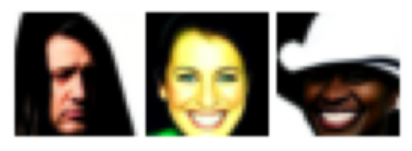